<a href="https://colab.research.google.com/github/itsmebebe/20242R0136COSE47402/blob/main/Timeseries_DL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic install Process

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.1 MB/s eta 0:00:00


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 13.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from pmdarima.arima import ndiffs
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
import matplotlib.pyplot as plt
import pandas as pd

#EDA Process

매주 간격의 구글 트렌드 데이터를 추출했기에 결측치가 없다.

In [ ]:
df=pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
print(df.head)

<bound method NDFrame.head of             Justice  Parliament  Economy  Trial
date                                           
2019-10-27       44          18       81     16
2019-11-03       44          16       76     15
2019-11-10       41          16       73     15
2019-11-17       40          17       76     12
2019-11-24       39          19       75     14
...             ...         ...      ...    ...
2024-09-29       37          19       69     15
2024-10-06       41          24       70     13
2024-10-13       47          23       79     15
2024-10-20       50          21       85     13
2024-10-27       52          19       87     13

[262 rows x 4 columns]>


## Basic Data Figure

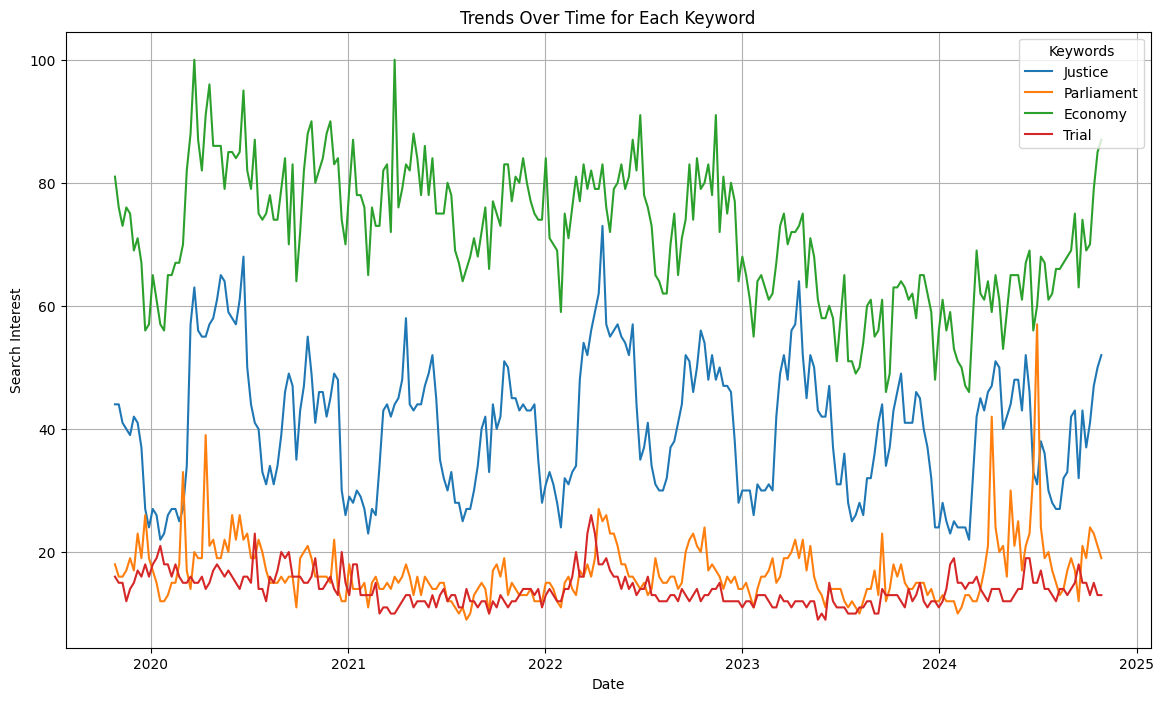

In [ ]:
plt.figure(figsize=(14, 8))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title("Trends Over Time for Each Keyword")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend(title="Keywords")
plt.grid(True)
plt.show()

## Correlation Analysis

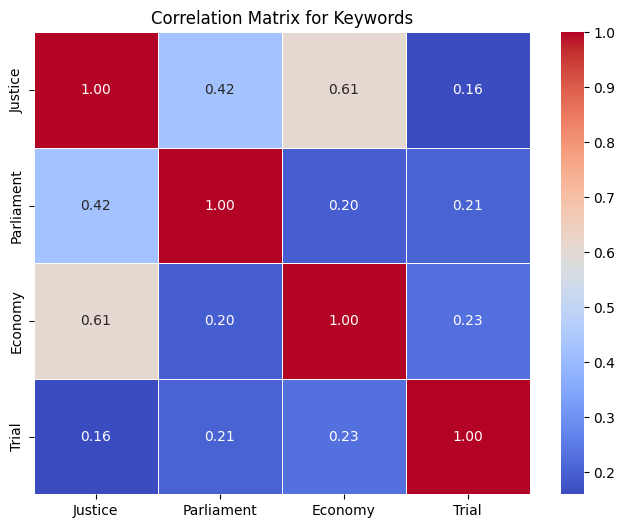

In [ ]:
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Keywords")
plt.show()

## ACF, PACF Check

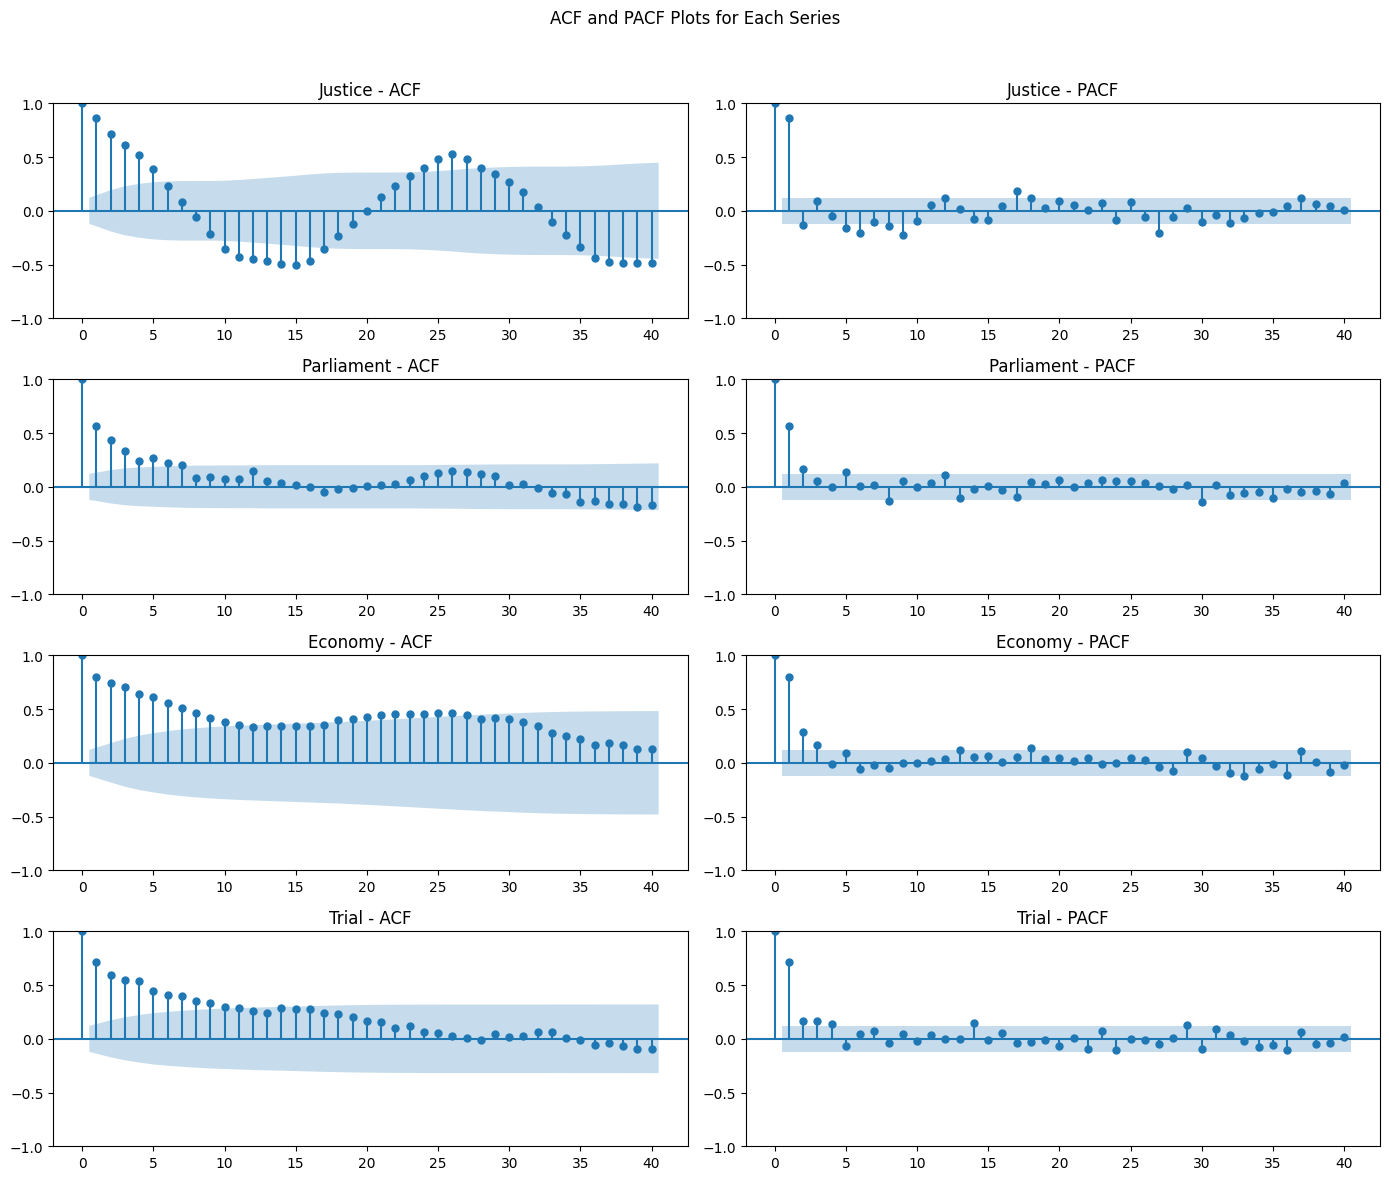

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(14, 12))
fig.suptitle('ACF and PACF Plots for Each Series')

for i, column in enumerate(df.columns):
    plot_acf(df[column], ax=axs[i, 0], lags=40, title=f'{column} - ACF')
    plot_pacf(df[column], ax=axs[i, 1], lags=40, title=f'{column} - PACF')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Stationary Check

In [ ]:
def adf_test(series, column_name):
    result = adfuller(series)
    print(f"\nADF Test for {column_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    if result[1] <= 0.05:
        print("The series is stationary.\n")
    else:
        print("The series is not stationary.\n")

for column in df.columns:
    adf_test(df[column], column)


ADF Test for Justice:
ADF Statistic: -3.7808712264693045
p-value: 0.0031092040913748456
Critical Values:
1%: -3.4573260719088132
5%: -2.873410402808354
10%: -2.573095980841316
The series is stationary.


ADF Test for Parliament:
ADF Statistic: -4.264405850839021
p-value: 0.0005116630093211127
Critical Values:
1%: -3.4560535712549925
5%: -2.8728527662442334
10%: -2.5727985212493754
The series is stationary.


ADF Test for Economy:
ADF Statistic: -2.9328619270202747
p-value: 0.04165788845213003
Critical Values:
1%: -3.4558530692911504
5%: -2.872764881778665
10%: -2.572751643088207
The series is stationary.


ADF Test for Trial:
ADF Statistic: -3.4426451905682307
p-value: 0.009588212356427754
Critical Values:
1%: -3.455952927706342
5%: -2.8728086526320302
10%: -2.572774990685656
The series is stationary.



# Long term Time Series Modelling

## SARIMA, GARCH Check


Analyzing Justice...



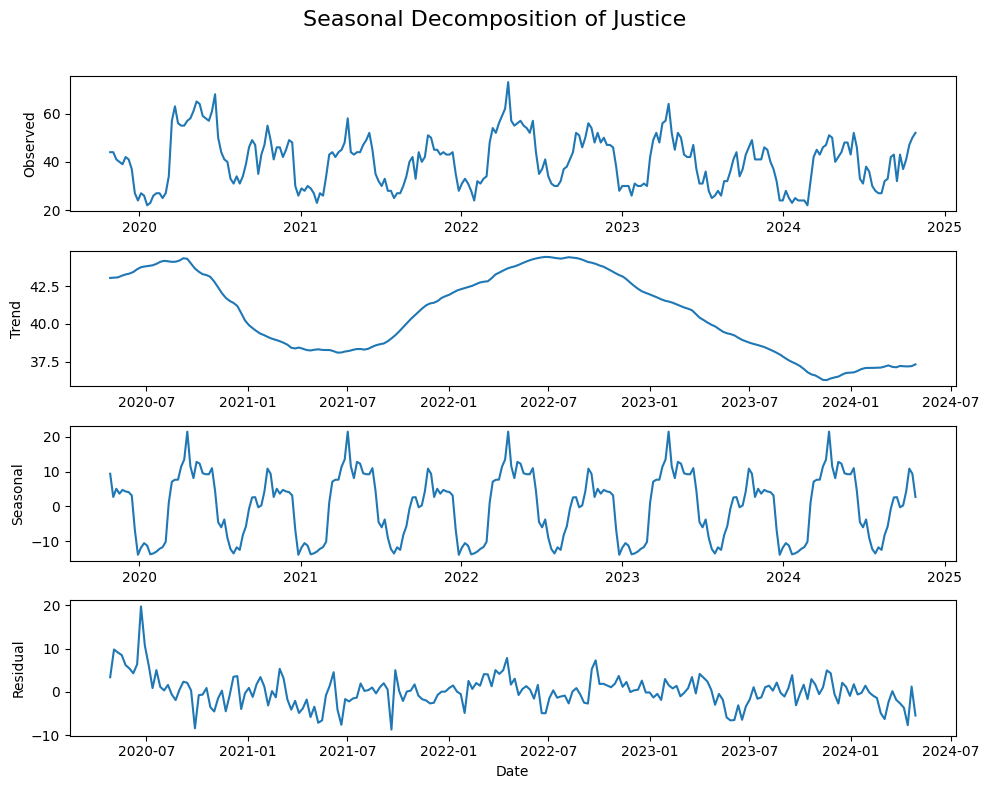

Finding best SARIMA model for Justice...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=22.15 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1989.349, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1565.898, Time=7.57 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1726.233, Time=2.65 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2702.764, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1623.665, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=inf, Time=27.65 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=12.29 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1581.508, Time=2.13 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=61.89 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=6.55 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=1567.777, Time=5.01 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=1567.706, Time=7.67 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=1683.415, Time=5.81 sec

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Justice   No. Observations:                  262
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 52)   Log Likelihood                -619.084
Date:                            Sat, 07 Dec 2024   AIC                           1244.169
Time:                                    10:33:51   BIC                           1254.196
Sample:                                10-27-2019   HQIC                          1248.223
                                     - 10-27-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9773      0.015     67.322      0.000       0.949       1.006
ar.S.L52       0.4754      0.047   

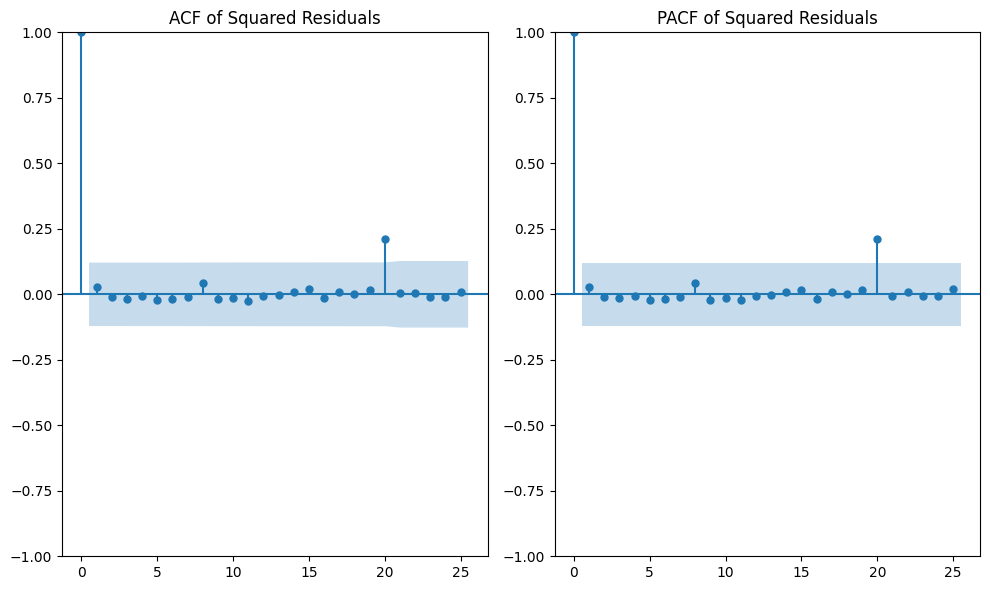

ARCH Test Statistic: 12.122646965103987
ARCH p-value: 0.2769320766649814
No significant ARCH effects detected: GARCH modeling is likely unnecessary.


Analyzing Parliament...



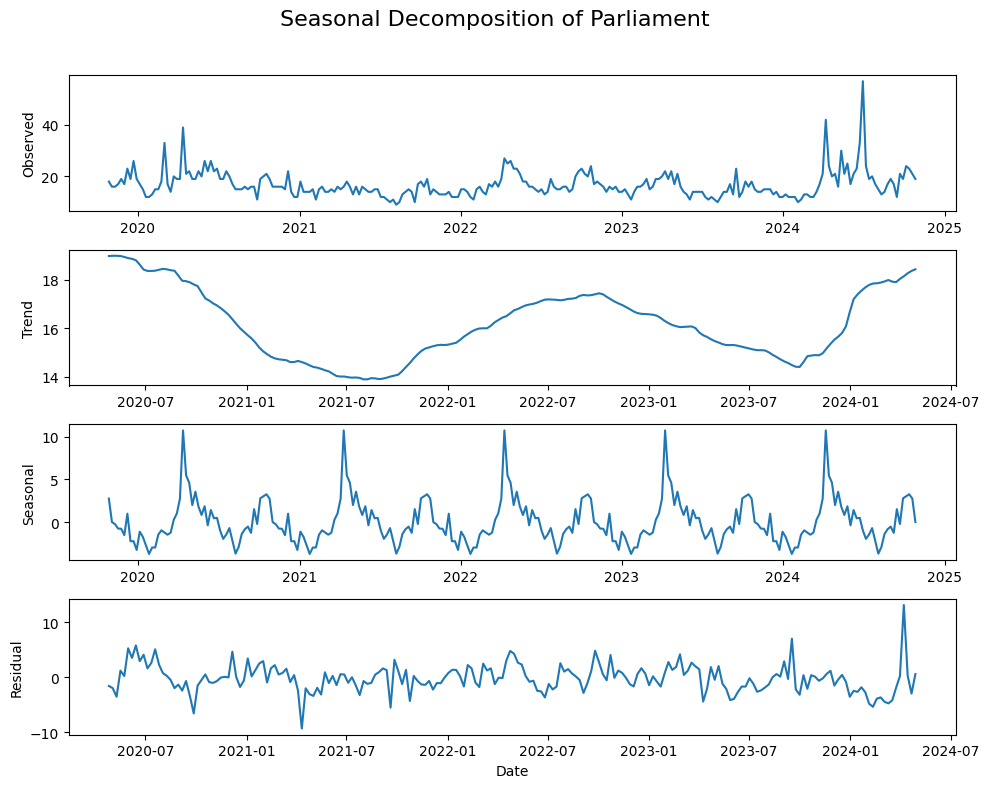

Finding best SARIMA model for Parliament...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=23.40 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1608.018, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1512.543, Time=3.95 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1546.126, Time=2.31 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2247.753, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1510.759, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1512.607, Time=6.18 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=14.38 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1505.079, Time=1.40 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=1506.588, Time=5.56 sec
 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=1506.720, Time=3.03 sec
 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=16.34 sec
 ARIMA(3,0,0)(0,0,0)[52] intercept   : AIC=1506.342, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=1505.771, T

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


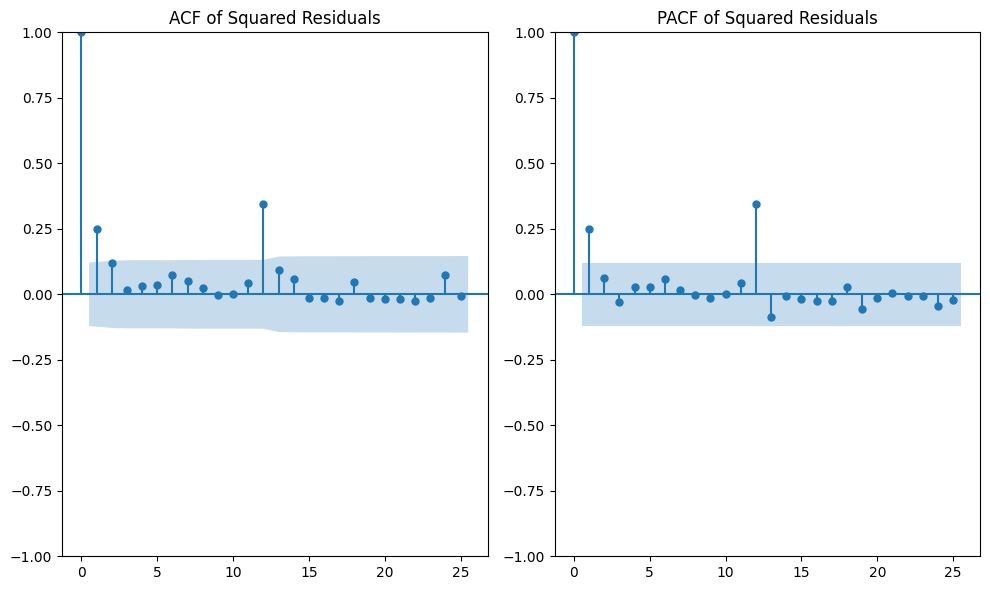

ARCH Test Statistic: 20.516876377373954
ARCH p-value: 0.02472599953604671
Significant ARCH effects detected: GARCH modeling may be appropriate.


Analyzing Economy...



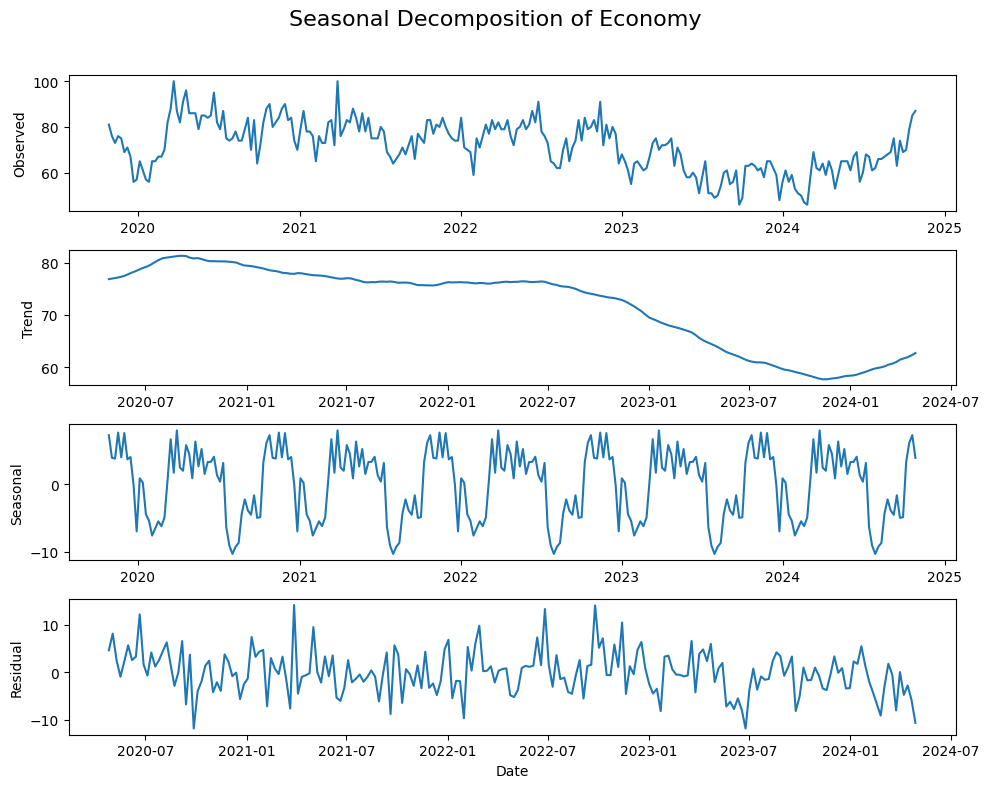

Finding best SARIMA model for Economy...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=16.46 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=1742.432, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=1708.372, Time=1.56 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=1695.793, Time=3.58 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=1740.435, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=1697.974, Time=0.39 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=22.48 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=1697.787, Time=11.45 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=1695.544, Time=1.69 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=1696.767, Time=13.64 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=inf, Time=68.14 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=1744.299, Time=1.70 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=1697.519, Time=2.52 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=1697.516, Ti

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                             Economy   No. Observations:                  262
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 52)   Log Likelihood                -667.439
Date:                             Sat, 07 Dec 2024   AIC                           1340.878
Time:                                     10:39:30   BIC                           1350.905
Sample:                                 10-27-2019   HQIC                          1344.932
                                      - 10-27-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5490      0.060     -9.178      0.000      -0.666      -0.432
ar.S.L52       0.1675      

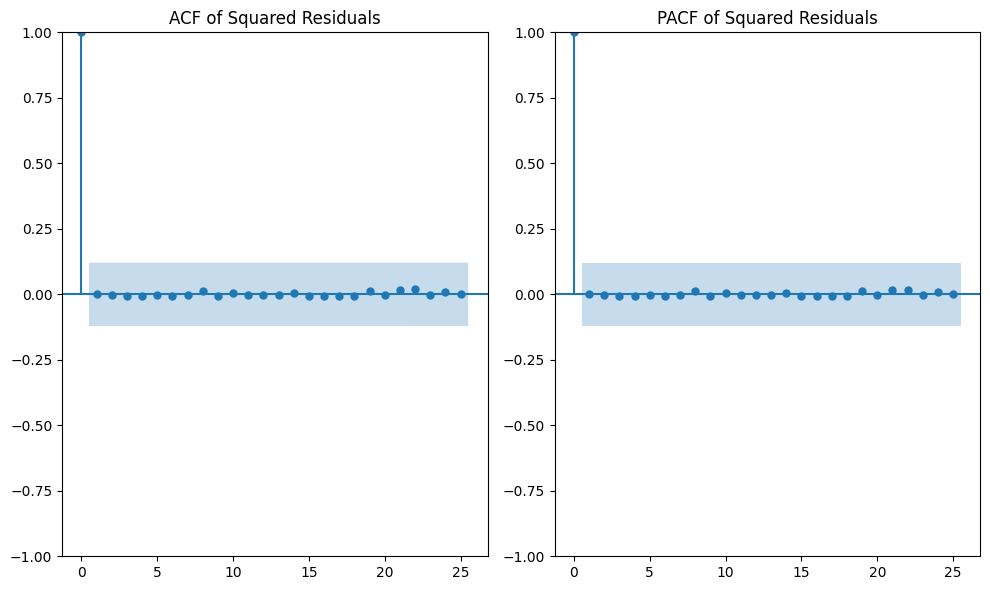

ARCH Test Statistic: 15.926529632222577
ARCH p-value: 0.10175497770697084
No significant ARCH effects detected: GARCH modeling is likely unnecessary.


Analyzing Trial...



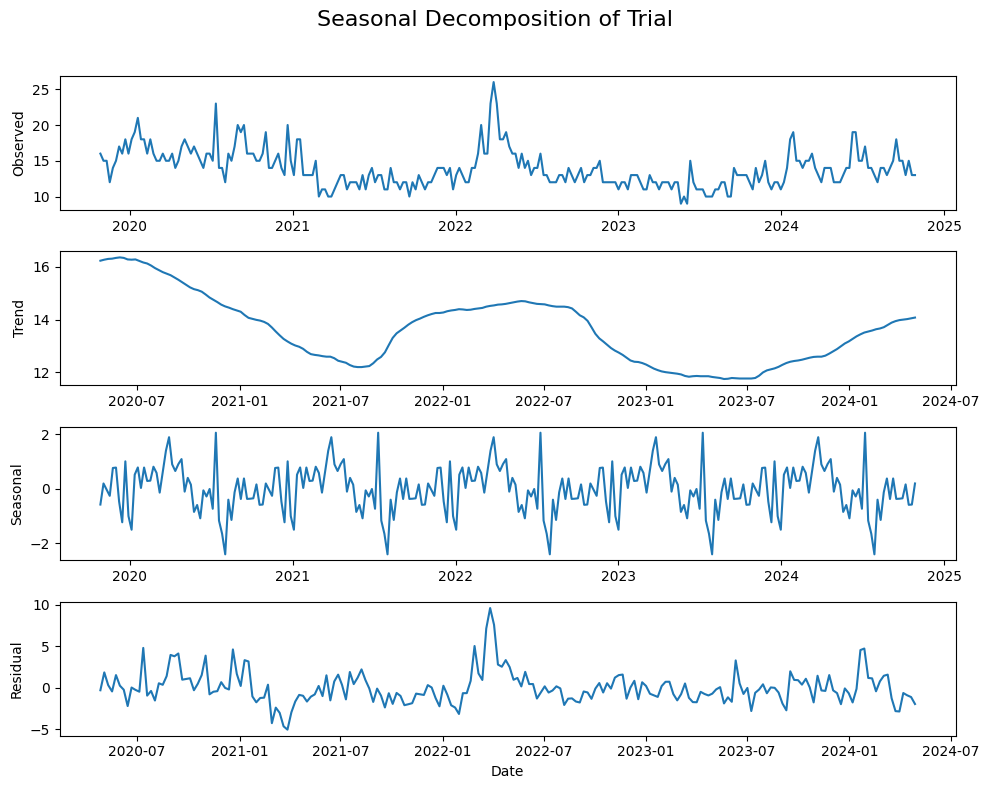

Finding best SARIMA model for Trial...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=1065.822, Time=15.87 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=1105.749, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=1084.052, Time=1.39 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=1067.059, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=1103.758, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=1063.824, Time=6.78 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=1064.068, Time=0.97 sec
 ARIMA(2,1,2)(0,0,2)[52] intercept   : AIC=1065.817, Time=38.46 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=1063.865, Time=9.89 sec
 ARIMA(2,1,2)(1,0,2)[52] intercept   : AIC=inf, Time=76.86 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=1061.731, Time=5.57 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=1061.701, Time=1.23 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=1061.735, Time=5.74 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=1063.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Trial   No. Observations:                  262
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -406.861
Date:                            Sat, 07 Dec 2024   AIC                            821.722
Time:                                    10:46:22   BIC                            835.053
Sample:                                10-27-2019   HQIC                           827.113
                                     - 10-27-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4225      0.103      4.091      0.000       0.220       0.625
ma.L1         -0.7912      0.073   

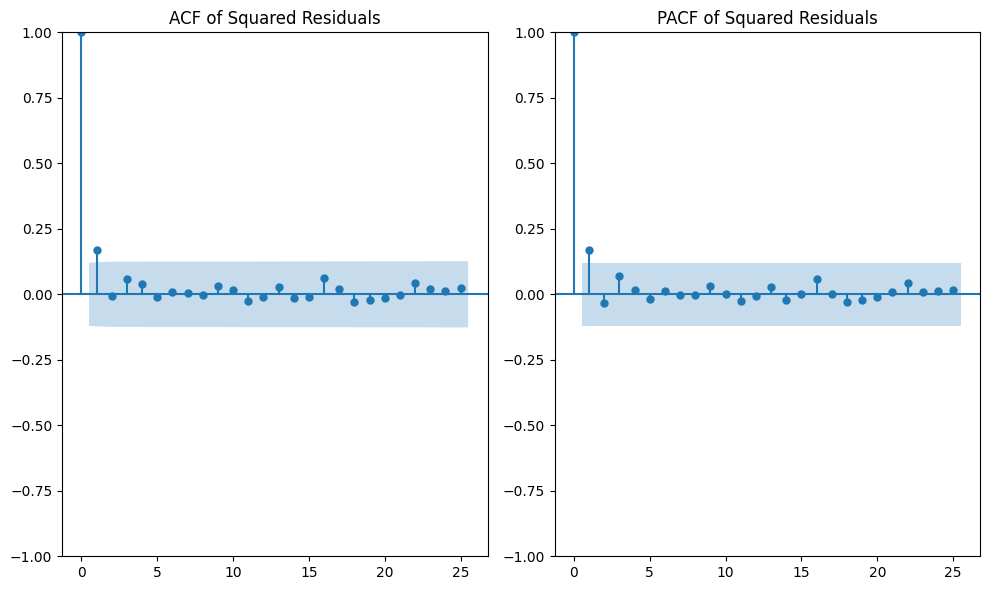

ARCH Test Statistic: 44.96760474037541
ARCH p-value: 2.204187715665199e-06
Significant ARCH effects detected: GARCH modeling may be appropriate.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Step 1: Time Series Decomposition
def decompose_series(series, seasonal_period):
    decomposition = seasonal_decompose(series, model='additive', period=seasonal_period)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
    fig.suptitle(f'Seasonal Decomposition of {series.name}', fontsize=16)

    ax1.plot(decomposition.observed)
    ax1.set_ylabel('Observed')

    ax2.plot(decomposition.trend)
    ax2.set_ylabel('Trend')

    ax3.plot(decomposition.seasonal)
    ax3.set_ylabel('Seasonal')

    ax4.plot(decomposition.resid)
    ax4.set_ylabel('Residual')
    ax4.set_xlabel('Date')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return decomposition.resid  # Return residuals for diagnostics

# Step 2: Fit SARIMA and Find Best Order
def fit_sarima(series, seasonal_period):
    print(f"Finding best SARIMA model for {series.name}...")
    sarima_model = auto_arima(series, seasonal=True, m=seasonal_period,
                              trace=True, error_action='ignore', suppress_warnings=True)
    print(f"Best SARIMA Order for {series.name}: {sarima_model.order}")
    print(f"Best Seasonal Order for {series.name}: {sarima_model.seasonal_order}")

    # Fit SARIMA model
    sarima = SARIMAX(series, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order,
                     enforce_stationarity=False, enforce_invertibility=False)
    results = sarima.fit(disp=False)
    print(results.summary())
    return results

# Step 3: Check for GARCH Necessity
def check_garch_necessity(residuals):
    # Plot ACF and PACF of Squared Residuals
    squared_residuals = residuals ** 2
    print(f"Analyzing volatility clustering for residuals of {residuals.name}...")

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plot_acf(squared_residuals.dropna(), ax=plt.gca(), title="ACF of Squared Residuals")
    plt.subplot(1, 2, 2)
    plot_pacf(squared_residuals.dropna(), ax=plt.gca(), title="PACF of Squared Residuals")
    plt.tight_layout()
    plt.show()

    # Perform ARCH test
    arch_test = het_arch(residuals.dropna())
    print(f"ARCH Test Statistic: {arch_test[0]}")
    print(f"ARCH p-value: {arch_test[1]}")
    if arch_test[1] < 0.05:
        print("Significant ARCH effects detected: GARCH modeling may be appropriate.\n")
    else:
        print("No significant ARCH effects detected: GARCH modeling is likely unnecessary.\n")

# Step 4: Combine Decomposition, SARIMA, and GARCH Analysis
seasonal_period = 52  # Assuming weekly data with yearly seasonality
for column in df.columns:
    print(f"\nAnalyzing {column}...\n")

    # 1. Decompose the series
    residuals = decompose_series(df[column], seasonal_period)

    # 2. Fit SARIMA and evaluate
    sarima_results = fit_sarima(df[column], seasonal_period)

    # 3. Check residuals for GARCH necessity
    check_garch_necessity(sarima_results.resid)


## Justice Long Term Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Justice   No. Observations:                  262
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 52)   Log Likelihood                -619.084
Date:                            Sun, 08 Dec 2024   AIC                           1244.169
Time:                                    15:57:13   BIC                           1254.196
Sample:                                10-27-2019   HQIC                          1248.223
                                     - 10-27-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9773      0.015     67.322      0.000       0.949       1.006
ar.S.L52       0.4754      0.047   

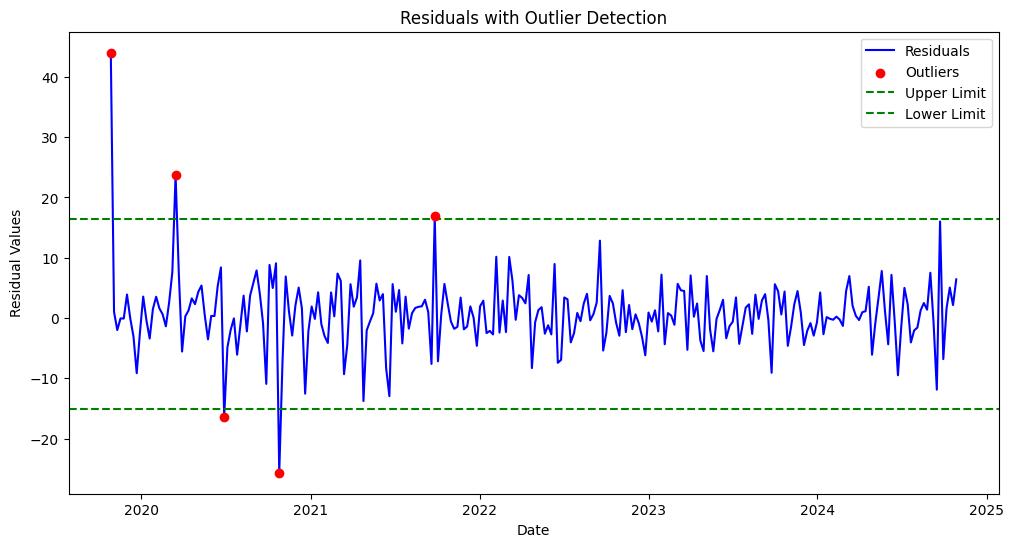

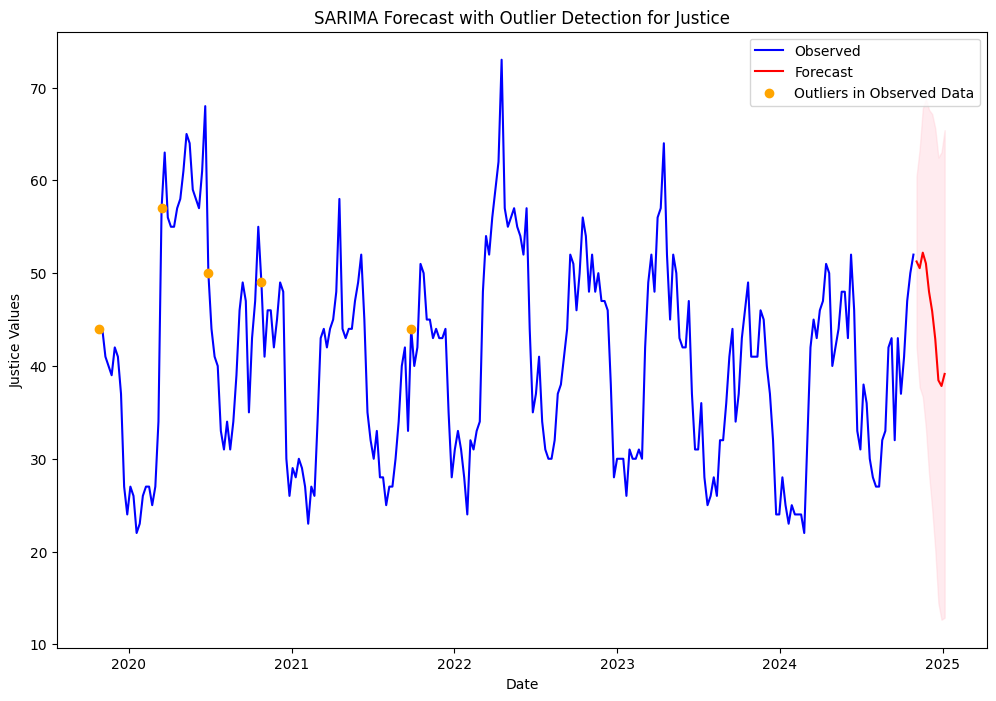

In [ ]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Fit the SARIMA model
sarima_model = SARIMAX(df['Justice'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 52),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)
residual_justice = sarima_results.resid

# Print model summary
print(sarima_results.summary())

# Detect outliers in residuals
mean_residual = np.mean(residual_justice)
std_residual = np.std(residual_justice)
upper_limit = mean_residual + 2.7 * std_residual
lower_limit = mean_residual - 2.7 * std_residual

# Identify outliers in residuals
outliers_residuals = (residual_justice > upper_limit) | (residual_justice < lower_limit)
outlier_dates_residuals = residual_justice[outliers_residuals].index
print(f"Outlier dates in residuals: {outlier_dates_residuals}")

# Plot residuals with outliers
plt.figure(figsize=(12, 6))
plt.plot(residual_justice, label="Residuals", color="blue")
plt.scatter(outlier_dates_residuals, residual_justice[outliers_residuals], color="red", label="Outliers", zorder=5)
plt.axhline(upper_limit, color="green", linestyle="--", label="Upper Limit")
plt.axhline(lower_limit, color="green", linestyle="--", label="Lower Limit")
plt.title("Residuals with Outlier Detection")
plt.xlabel("Date")
plt.ylabel("Residual Values")
plt.legend()
plt.show()

# Forecast future values
forecast_steps = 10  # Change as needed
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot observed data, forecast, and detected outliers
plt.figure(figsize=(12, 8))
plt.plot(df['Justice'], label="Observed", color="blue")
plt.plot(forecast.predicted_mean, label="Forecast", color="red")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)

# Highlight outliers in observed data
outliers_observed = df['Justice'][outlier_dates_residuals]
plt.scatter(outliers_observed.index, outliers_observed, color="orange", label="Outliers in Observed Data", zorder=5)

# Add title and labels
plt.title("SARIMA Forecast with Outlier Detection for Justice")
plt.xlabel("Date")
plt.ylabel("Justice Values")
plt.legend()
plt.show()


##Parliamentary Long Term Model

### Fit SARIMA + GARCH model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Parliament   No. Observations:                  262
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -753.309
Date:                Sat, 07 Dec 2024   AIC                           1512.618
Time:                        11:58:39   BIC                           1523.300
Sample:                    10-27-2019   HQIC                          1516.912
                         - 10-27-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9941      0.009    116.585      0.000       0.977       1.011
ma.L1         -0.5457      0.033    -16.552      0.000      -0.610      -0.481
sigma2        19.2102      0.695     27.657      0.0

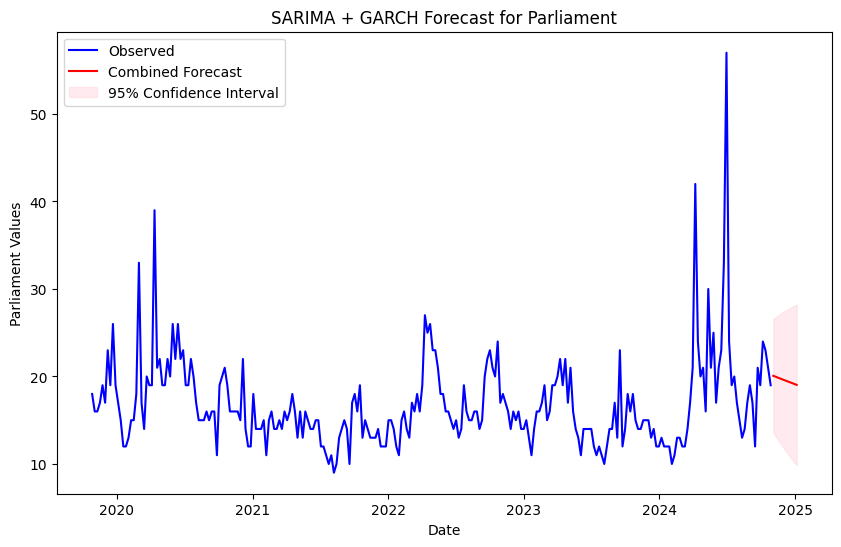

In [ ]:
# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentimentt.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Select the Parliament series
series = df['Parliament']

# Step 1: Fit the SARIMA model
sarima_model = SARIMAX(series, order=(1, 0, 1), seasonal_order=(0, 0, 0, 52),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)
print(sarima_results.summary())

# Get SARIMA residuals
sarima_residuals = sarima_results.resid

# Step 2: Fit the GARCH model on SARIMA residuals
garch_model = arch_model(sarima_residuals, vol='Garch', p=1, q=1, mean='Zero')
garch_results = garch_model.fit(disp="off")
print(garch_results.summary())

# Step 3: Forecast Using SARIMA + GARCH
forecast_steps = 10  # Number of steps to forecast

# SARIMA forecast
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)
sarima_mean_forecast = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

# GARCH forecast (variance)
garch_forecast = garch_results.forecast(horizon=forecast_steps)
garch_variance = garch_forecast.variance.iloc[-1]
garch_std = garch_variance**0.5  # Standard deviation

# Combine SARIMA mean with GARCH variance for prediction
combined_forecast = sarima_mean_forecast
combined_conf_upper = combined_forecast + 1.96 * garch_std.values
combined_conf_lower = combined_forecast - 1.96 * garch_std.values

# Step 4: Visualize the Forecast
forecast_dates = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='W')[1:]

plt.figure(figsize=(10, 6))

# Plot observed data
plt.plot(series, label="Observed", color="blue")

# Plot SARIMA + GARCH forecast
plt.plot(forecast_dates, combined_forecast, label="Combined Forecast", color="red")
plt.fill_between(forecast_dates, combined_conf_lower, combined_conf_upper, color="pink", alpha=0.3, label="95% Confidence Interval")

# Add labels, legend, and title
plt.title("SARIMA + GARCH Forecast for Parliament")
plt.xlabel("Date")
plt.ylabel("Parliament Values")
plt.legend()
plt.show()


### Residual

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Trial   No. Observations:                  262
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -406.861
Date:                            Sun, 08 Dec 2024   AIC                            821.722
Time:                                    03:50:41   BIC                            835.053
Sample:                                10-27-2019   HQIC                           827.113
                                     - 10-27-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4225      0.103      4.091      0.000       0.220       0.625
ma.L1         -0.7912      0.073   

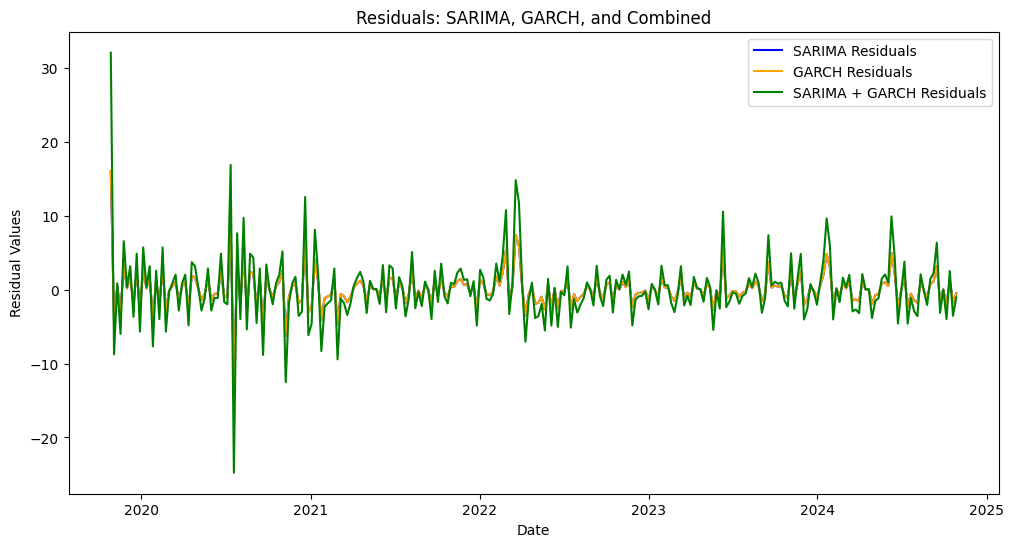

Outlier dates: DatetimeIndex(['2019-10-27', '2020-07-12', '2020-07-19', '2020-11-08',
               '2020-12-20', '2022-03-20'],
              dtype='datetime64[ns]', name='date', freq=None)


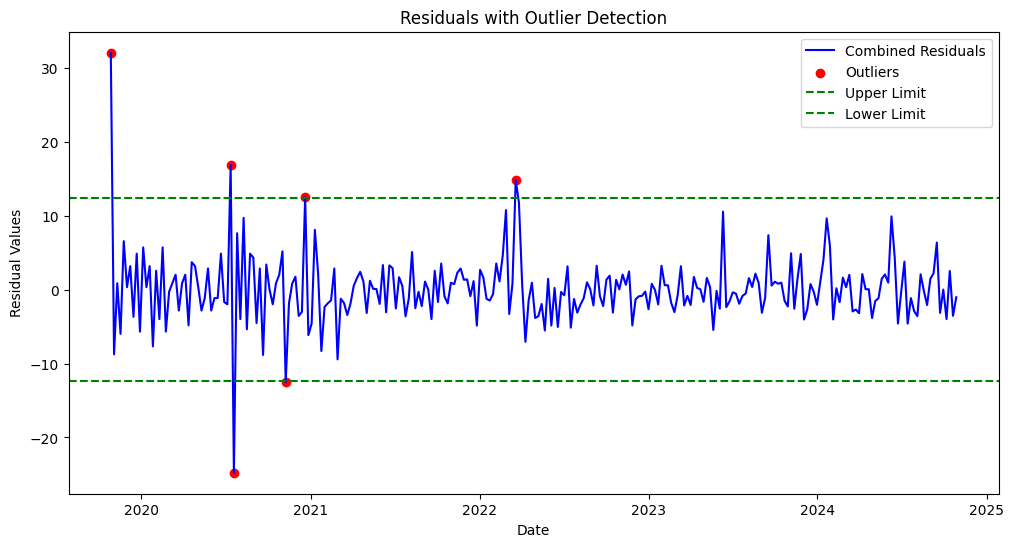

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Extract the Trial series
series = df['Trial']

# Step 1: Fit the SARIMA model
sarima_model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(0, 0, 1, 52),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)
print(sarima_results.summary())

# Get SARIMA residuals
sarima_residuals = sarima_results.resid

# Step 2: Fit the GARCH model on SARIMA residuals
garch_model = arch_model(sarima_residuals, vol='Garch', p=1, q=1, mean='Zero')
garch_results = garch_model.fit(disp="off")
print(garch_results.summary())

# Calculate residuals for SARIMA + GARCH
# Combine the SARIMA predicted values and the GARCH residuals
sarima_predicted_values = sarima_results.fittedvalues
garch_residuals = garch_results.resid
combined_residuals = sarima_residuals + garch_residuals

# Visualize residuals
plt.figure(figsize=(12, 6))
plt.plot(sarima_residuals, label="SARIMA Residuals", color="blue")
plt.plot(garch_residuals, label="GARCH Residuals", color="orange")
plt.plot(combined_residuals, label="SARIMA + GARCH Residuals", color="green")
plt.title("Residuals: SARIMA, GARCH, and Combined")
plt.xlabel("Date")
plt.ylabel("Residual Values")
plt.legend()
plt.show()

# Outlier detection on combined residuals
mean_residual = np.mean(combined_residuals)
std_residual = np.std(combined_residuals)
upper_limit = mean_residual + 2.7 * std_residual
lower_limit = mean_residual - 2.7 * std_residual

outliers = (combined_residuals > upper_limit) | (combined_residuals < lower_limit)
outlier_dates = combined_residuals[outliers].index
print(f"Outlier dates: {outlier_dates}")

# Plot residuals with outliers
plt.figure(figsize=(12, 6))
plt.plot(combined_residuals, label="Combined Residuals", color="blue")
plt.scatter(outlier_dates, combined_residuals[outliers], color="red", label="Outliers")
plt.axhline(upper_limit, color="green", linestyle="--", label="Upper Limit")
plt.axhline(lower_limit, color="green", linestyle="--", label="Lower Limit")
plt.title("Residuals with Outlier Detection")
plt.xlabel("Date")
plt.ylabel("Residual Values")
plt.legend()
plt.show()


### Fit LSTM Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0190 - val_loss: 0.0270
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - val_loss: 0.0262
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0072 - val_loss: 0.0283
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0072 - val_loss: 0.0280
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - val_loss: 0.0264
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0074 - val_loss: 0.0270
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0053 - val_loss: 0.0269
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0057 - val_loss: 0.0261
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0056 - val_loss: 0.0265
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0076 - val_loss: 0.0273
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0060 - val_loss: 0.0262
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0054 - val_loss: 0.0260
E

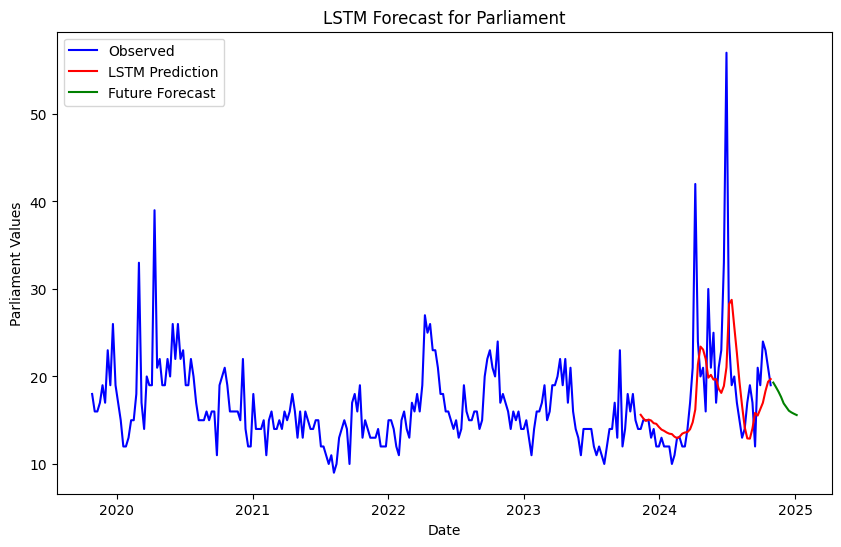

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Extract the 'Parliament' column and normalize
data = df[['Parliament']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

# Reshape X for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Extend predictions to future steps
forecast_steps = 10
future_input = scaled_data[-time_steps:].reshape(1, time_steps, 1)

future_predictions = []
for _ in range(forecast_steps):
    pred = model.predict(future_input)[0, 0]
    future_predictions.append(pred)
    # Update future_input with the latest prediction
    future_input = np.append(future_input[:, 1:, :], [[[pred]]], axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, data, label="Observed", color="blue")
plt.plot(df.index[-len(predictions):], predictions, label="LSTM Prediction", color="red")

# Plot future predictions
future_dates = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='W')[1:]
plt.plot(future_dates, future_predictions, label="Future Forecast", color="green")

plt.title("LSTM Forecast for Parliament")
plt.xlabel("Date")
plt.ylabel("Parliament Values")
plt.legend()
plt.show()


### Fit ETS Model (Outlier Detection)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


ETS Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:               Parliament   No. Observations:                  262
Model:             ExponentialSmoothing   SSE                           3308.609
Optimized:                         True   AIC                            778.416
Trend:                         Additive   BIC                            981.812
Seasonal:                      Additive   AICC                           813.465
Seasonal Periods:                    52   Date:                 Sun, 08 Dec 2024
Box-Cox:                          False   Time:                         03:38:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3093875                alpha                 True
smooth

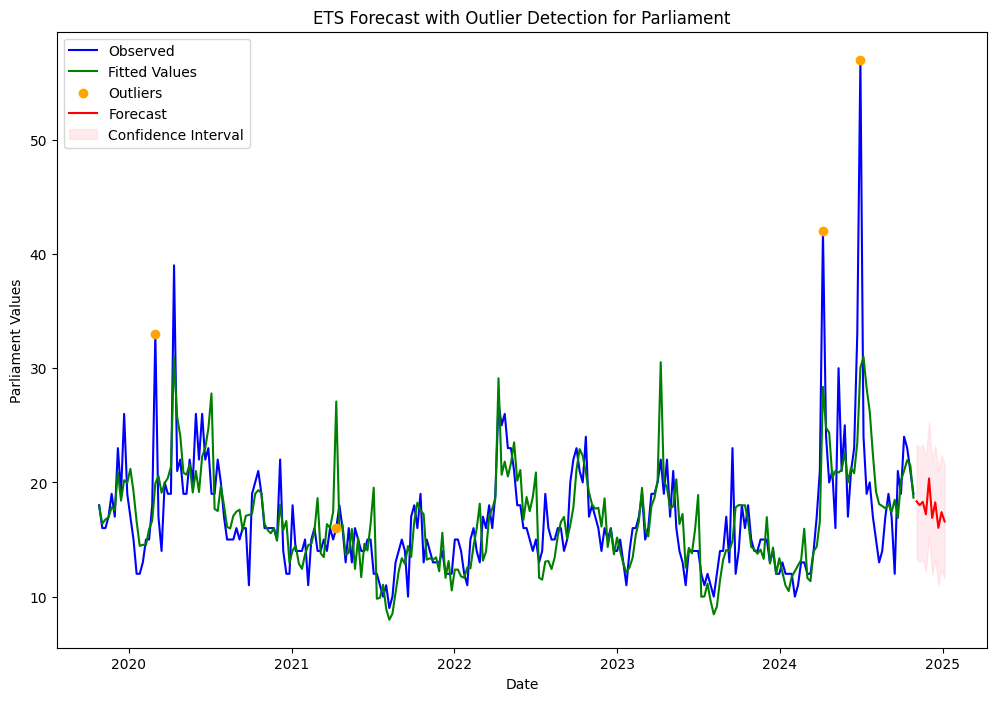

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Extract the Parliament series
series = df['Parliament']

# Fit the ETS model
ets_model = ExponentialSmoothing(series, seasonal='add', seasonal_periods=52, trend='add', damped_trend=True)
ets_results = ets_model.fit()

# Print model summary
print("ETS Model Summary:")
print(ets_results.summary())

# Calculate residuals (Observed - Fitted)
residuals = series - ets_results.fittedvalues

# Define outlier thresholds
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
upper_limit = mean_residual + 3 * std_residual  # 3 standard deviations above the mean
lower_limit = mean_residual - 3 * std_residual  # 3 standard deviations below the mean

# Detect outliers
outliers = (residuals > upper_limit) | (residuals < lower_limit)

# Highlight outlier dates
outlier_dates = series[outliers].index
print(f"Outlier dates: {outlier_dates}")

# Forecast future values
forecast_steps = 10
forecast = ets_results.forecast(steps=forecast_steps)

# Generate a date range for the forecast
forecast_dates = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the results with outliers
plt.figure(figsize=(12, 8))
plt.plot(series, label="Observed", color="blue")  # Observed data
plt.plot(ets_results.fittedvalues, label="Fitted Values", color="green")  # Fitted values
plt.scatter(series.index[outliers], series[outliers], color="orange", label="Outliers", zorder=5)  # Outliers
plt.plot(forecast_dates, forecast, label="Forecast", color="red")  # Forecasted values
plt.fill_between(forecast_dates, forecast - 5, forecast + 5, color="pink", alpha=0.3, label="Confidence Interval")
plt.title("ETS Forecast with Outlier Detection for Parliament")
plt.xlabel("Date")
plt.ylabel("Parliament Values")
plt.legend()
plt.show()


## Economy Long Term Model

### Fit Basic SARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                             Economy   No. Observations:                  262
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 52)   Log Likelihood                -667.439
Date:                             Sat, 07 Dec 2024   AIC                           1340.878
Time:                                     12:07:26   BIC                           1350.905
Sample:                                 10-27-2019   HQIC                          1344.932
                                      - 10-27-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5490      0.060     -9.178      0.000      -0.666      -0.432
ar.S.L52       0.1675      

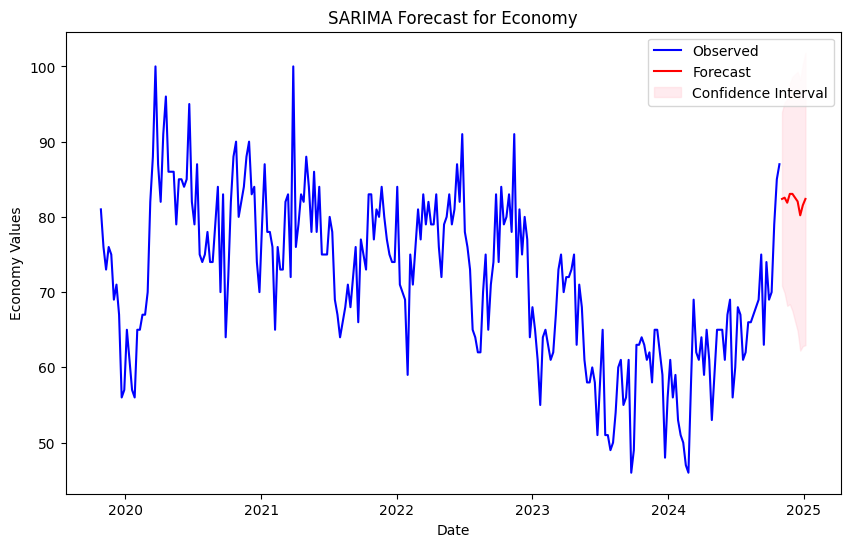

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Fit the SARIMA model
sarima_model = SARIMAX(df['Economy'], order=(0, 1, 1), seasonal_order=(1, 0, 0, 52),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)

# Print model summary
print(sarima_results.summary())

# Forecast future values
forecast_steps = 10  # Number of steps to forecast
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Economy'], label="Observed", color="blue")  # Observed data
plt.plot(forecast.predicted_mean, label="Forecast", color="red")  # Forecasted values
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3, label="Confidence Interval")
plt.title("SARIMA Forecast for Economy")
plt.xlabel("Date")
plt.ylabel("Economy Values")
plt.legend()
plt.show()


### Fit ETS Model (Outlier Detection)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


ETS Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Economy   No. Observations:                  262
Model:             ExponentialSmoothing   SSE                           6203.456
Optimized:                         True   AIC                            943.104
Trend:                         Additive   BIC                           1146.499
Seasonal:                      Additive   AICC                           978.153
Seasonal Periods:                    52   Date:                 Sun, 08 Dec 2024
Box-Cox:                          False   Time:                         03:31:00
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3340680                alpha                 True
smooth

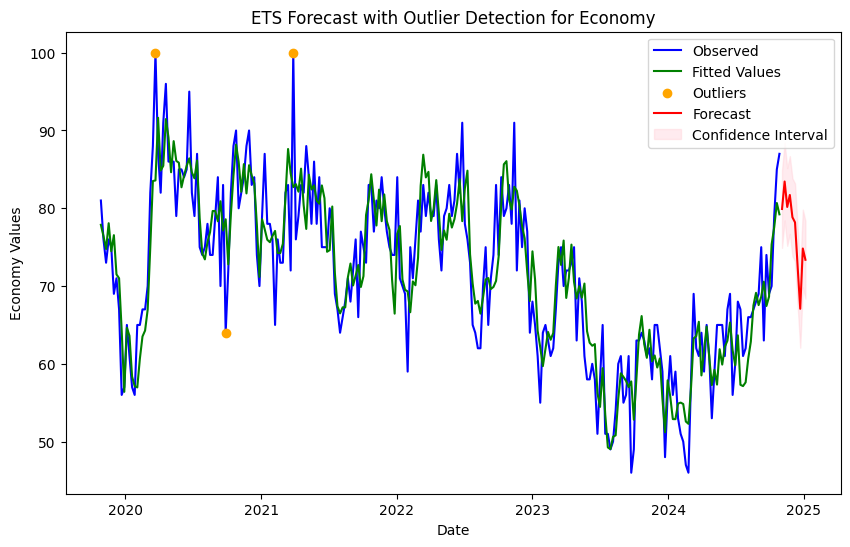

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Extract the Economy series
series = df['Economy']

# Fit the ETS model
ets_model = ExponentialSmoothing(series, seasonal='add', seasonal_periods=52, trend='add', damped_trend=True)
ets_results = ets_model.fit()

# Print model summary
print("ETS Model Summary:")
print(ets_results.summary())

# Forecast future values
forecast_steps = 10
forecast = ets_results.forecast(steps=forecast_steps)

# Generate a date range for the forecast
forecast_dates = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Evaluate the model using Mean Squared Error (MSE)
if len(series) > forecast_steps:
    y_true = series[-forecast_steps:]
    y_pred = ets_results.fittedvalues[-forecast_steps:]
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

# Calculate residuals
residuals = series - ets_results.fittedvalues

# Define outliers: residuals beyond 3 standard deviations from the mean
std_dev = np.std(residuals)
mean_residual = np.mean(residuals)
upper_limit = mean_residual + 2.7 * std_dev
lower_limit = mean_residual - 2.7 * std_dev
#But I will select IQR method so I change 3 with 2.7

outliers = (residuals > upper_limit) | (residuals < lower_limit)

# Plot the results
plt.figure(figsize=(10, 6))

# Observed data
plt.plot(series, label="Observed", color="blue")

# Fitted values
plt.plot(ets_results.fittedvalues, label="Fitted Values", color="green")

# Highlight outliers
plt.scatter(series.index[outliers], series[outliers], color="orange", label="Outliers", zorder=5)

# Forecasted values
plt.plot(forecast_dates, forecast, label="Forecast", color="red")

# Confidence interval
plt.fill_between(forecast_dates, forecast - 5, forecast + 5, color="pink", alpha=0.3, label="Confidence Interval")

# Add labels, legend, and title
plt.title("ETS Forecast with Outlier Detection for Economy")
plt.xlabel("Date")
plt.ylabel("Economy Values")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


ETS Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Economy   No. Observations:                  262
Model:             ExponentialSmoothing   SSE                           6203.456
Optimized:                         True   AIC                            943.104
Trend:                         Additive   BIC                           1146.499
Seasonal:                      Additive   AICC                           978.153
Seasonal Periods:                    52   Date:                 Sun, 08 Dec 2024
Box-Cox:                          False   Time:                         03:59:12
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3340680                alpha                 True
smooth

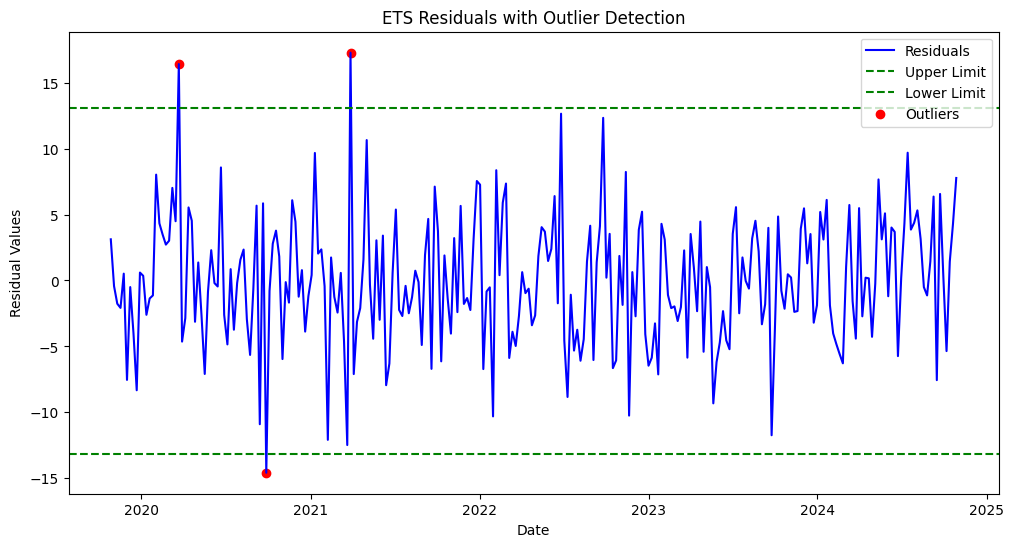

Mean Squared Error (MSE): 25.42366314872657


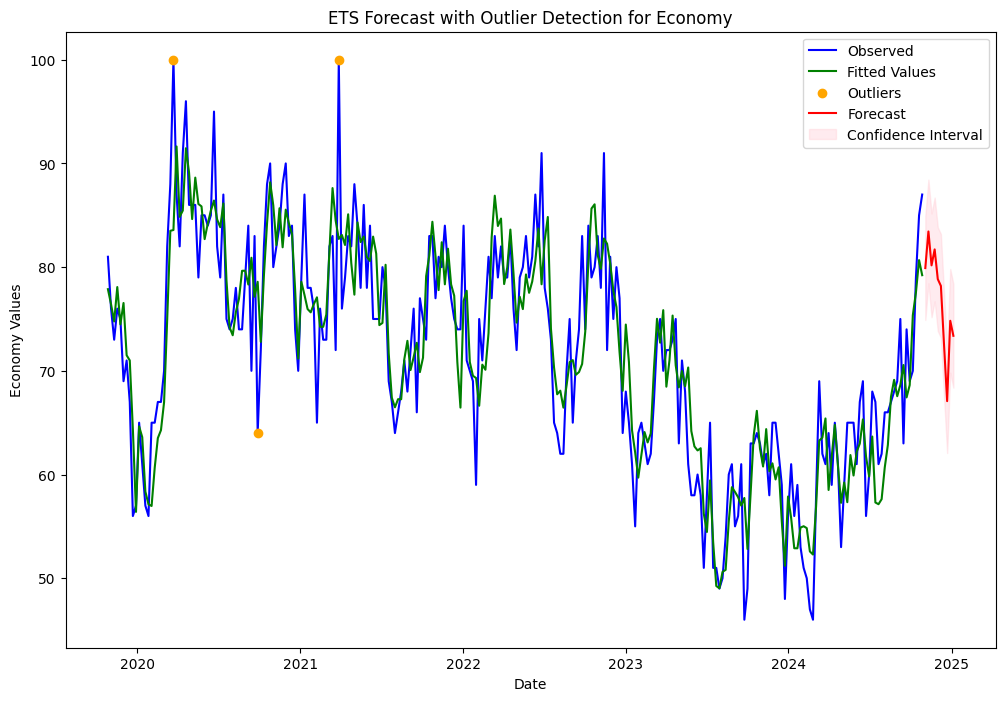

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Extract the Economy series
series = df['Economy']

# Fit the ETS model
ets_model = ExponentialSmoothing(series, seasonal='add', seasonal_periods=52, trend='add', damped_trend=True)
ets_results = ets_model.fit()

# Print model summary
print("ETS Model Summary:")
print(ets_results.summary())

# Calculate residuals
residuals = series - ets_results.fittedvalues

# Define outliers: residuals beyond 2.7 standard deviations from the mean
mean_residual = np.mean(residuals)
std_dev_residual = np.std(residuals)
upper_limit = mean_residual + 2.7 * std_dev_residual
lower_limit = mean_residual - 2.7 * std_dev_residual

# Detect outliers
outliers = (residuals > upper_limit) | (residuals < lower_limit)
outlier_dates = residuals[outliers].index

# Plot residuals with outliers
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuals", color="blue")
plt.axhline(upper_limit, color="green", linestyle="--", label="Upper Limit")
plt.axhline(lower_limit, color="green", linestyle="--", label="Lower Limit")
plt.scatter(outlier_dates, residuals[outliers], color="red", label="Outliers")
plt.title("ETS Residuals with Outlier Detection")
plt.xlabel("Date")
plt.ylabel("Residual Values")
plt.legend()
plt.show()

# Forecast future values
forecast_steps = 10
forecast = ets_results.forecast(steps=forecast_steps)

# Generate a date range for the forecast
forecast_dates = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Evaluate the model using Mean Squared Error (MSE)
if len(series) > forecast_steps:
    y_true = series[-forecast_steps:]
    y_pred = ets_results.fittedvalues[-forecast_steps:]
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

# Plot observed, forecast, and fitted values with outliers
plt.figure(figsize=(12, 8))
plt.plot(series, label="Observed", color="blue")
plt.plot(ets_results.fittedvalues, label="Fitted Values", color="green")
plt.scatter(series.index[outliers], series[outliers], color="orange", label="Outliers", zorder=5)
plt.plot(forecast_dates, forecast, label="Forecast", color="red")
plt.fill_between(forecast_dates, forecast - 5, forecast + 5, color="pink", alpha=0.3, label="Confidence Interval")
plt.title("ETS Forecast with Outlier Detection for Economy")
plt.xlabel("Date")
plt.ylabel("Economy Values")
plt.legend()
plt.show()


## Trial Long Term Model

### Fit SARIMA+GARCH Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Trial   No. Observations:                  262
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -406.861
Date:                            Sat, 07 Dec 2024   AIC                            821.722
Time:                                    11:50:01   BIC                            835.053
Sample:                                10-27-2019   HQIC                           827.113
                                     - 10-27-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4225      0.103      4.091      0.000       0.220       0.625
ma.L1         -0.7912      0.073   

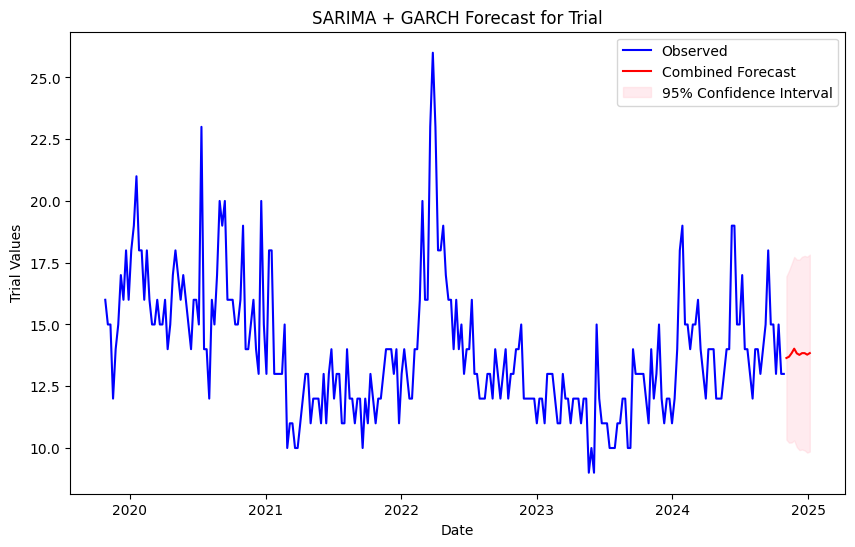

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Extract the Trial series
series = df['Trial']

# Step 1: Fit the SARIMA model
sarima_model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(0, 0, 1, 52),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)
print(sarima_results.summary())

# Get SARIMA residuals
sarima_residuals = sarima_results.resid

# Step 2: Fit the GARCH model on SARIMA residuals
garch_model = arch_model(sarima_residuals, vol='Garch', p=1, q=1, mean='Zero')
garch_results = garch_model.fit(disp="off")
print(garch_results.summary())

# Step 3: Forecast Using SARIMA + GARCH
forecast_steps = 10  # Number of steps to forecast

# SARIMA forecast
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)
sarima_mean_forecast = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

# GARCH forecast (variance)
garch_forecast = garch_results.forecast(horizon=forecast_steps)
garch_variance = garch_forecast.variance.iloc[-1]
garch_std = garch_variance**0.5  # Standard deviation

# Combine SARIMA mean with GARCH variance for prediction
combined_forecast = sarima_mean_forecast
combined_conf_upper = combined_forecast + 1.96 * garch_std.values
combined_conf_lower = combined_forecast - 1.96 * garch_std.values

# Step 4: Visualize the Forecast
forecast_dates = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='W')[1:]

plt.figure(figsize=(10, 6))

# Plot observed data
plt.plot(series, label="Observed", color="blue")

# Plot SARIMA + GARCH forecast
plt.plot(forecast_dates, combined_forecast, label="Combined Forecast", color="red")
plt.fill_between(forecast_dates, combined_conf_lower, combined_conf_upper, color="pink", alpha=0.3, label="95% Confidence Interval")

# Add labels, legend, and title
plt.title("SARIMA + GARCH Forecast for Trial")
plt.xlabel("Date")
plt.ylabel("Trial Values")
plt.legend()
plt.show()


### Residual

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Trial   No. Observations:                  262
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -406.861
Date:                            Sun, 08 Dec 2024   AIC                            821.722
Time:                                    03:45:50   BIC                            835.053
Sample:                                10-27-2019   HQIC                           827.113
                                     - 10-27-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4225      0.103      4.091      0.000       0.220       0.625
ma.L1         -0.7912      0.073   

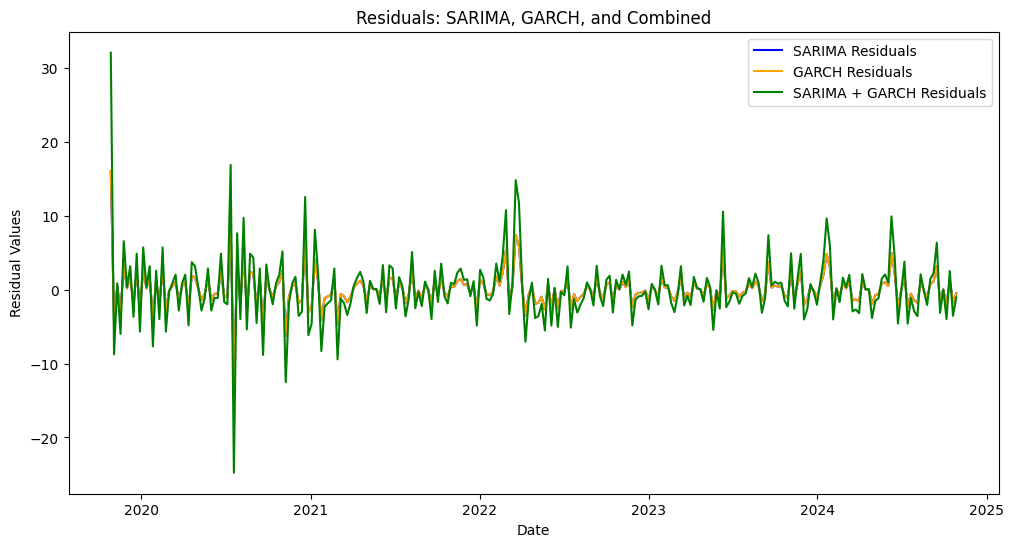

Outlier dates: DatetimeIndex(['2019-10-27', '2020-07-12', '2020-07-19', '2020-11-08',
               '2020-12-20', '2022-03-20'],
              dtype='datetime64[ns]', name='date', freq=None)


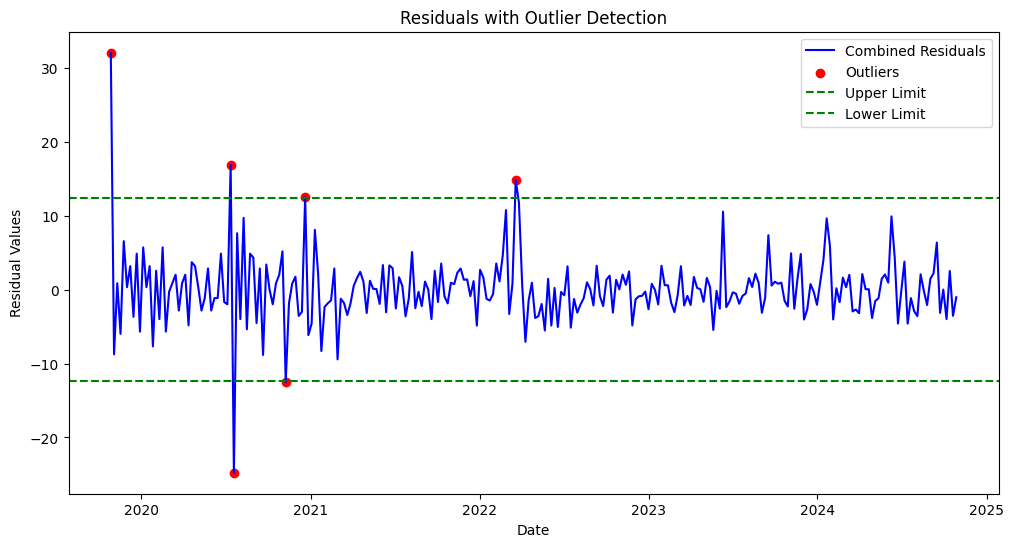

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("DL_longterm_PublicSentiment.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Extract the Trial series
series = df['Trial']

# Step 1: Fit the SARIMA model
sarima_model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(0, 0, 1, 52),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)
print(sarima_results.summary())

# Get SARIMA residuals
sarima_residuals = sarima_results.resid

# Step 2: Fit the GARCH model on SARIMA residuals
garch_model = arch_model(sarima_residuals, vol='Garch', p=1, q=1, mean='Zero')
garch_results = garch_model.fit(disp="off")
print(garch_results.summary())

# Calculate residuals for SARIMA + GARCH
# Combine the SARIMA predicted values and the GARCH residuals
sarima_predicted_values = sarima_results.fittedvalues
garch_residuals = garch_results.resid
combined_residuals = sarima_residuals + garch_residuals

# Visualize residuals
plt.figure(figsize=(12, 6))
plt.plot(sarima_residuals, label="SARIMA Residuals", color="blue")
plt.plot(garch_residuals, label="GARCH Residuals", color="orange")
plt.plot(combined_residuals, label="SARIMA + GARCH Residuals", color="green")
plt.title("Residuals: SARIMA, GARCH, and Combined")
plt.xlabel("Date")
plt.ylabel("Residual Values")
plt.legend()
plt.show()

# Outlier detection on combined residuals
mean_residual = np.mean(combined_residuals)
std_residual = np.std(combined_residuals)
upper_limit = mean_residual + 2.7 * std_residual
lower_limit = mean_residual - 2.7 * std_residual

outliers = (combined_residuals > upper_limit) | (combined_residuals < lower_limit)
outlier_dates = combined_residuals[outliers].index
print(f"Outlier dates: {outlier_dates}")

# Plot residuals with outliers
plt.figure(figsize=(12, 6))
plt.plot(combined_residuals, label="Combined Residuals", color="blue")
plt.scatter(outlier_dates, combined_residuals[outliers], color="red", label="Outliers")
plt.axhline(upper_limit, color="green", linestyle="--", label="Upper Limit")
plt.axhline(lower_limit, color="green", linestyle="--", label="Lower Limit")
plt.title("Residuals with Outlier Detection")
plt.xlabel("Date")
plt.ylabel("Residual Values")
plt.legend()
plt.show()


## 추후 연구

### Multivariate Analysis

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Justice를 예측하는 SARIMAX 모델 (Economy를 외생 변수로 사용)
model = SARIMAX(df['Justice'], order=(1, 1, 1), seasonal_order=(1, 0, 0, 52),
                exog=df[['Economy']])
results = model.fit()
print(results.summary())

# 예측
forecast = results.get_forecast(steps=10, exog=df[['Economy']].iloc[-10:])
forecast_ci = forecast.conf_int()


flat하게 나타나는 이유는 현재의 voltality가 적기 때문이다.

## Outlier Detection
Because it is time series data, we gather outlier not using simple zscore but using rolling statistics and Model Residual.

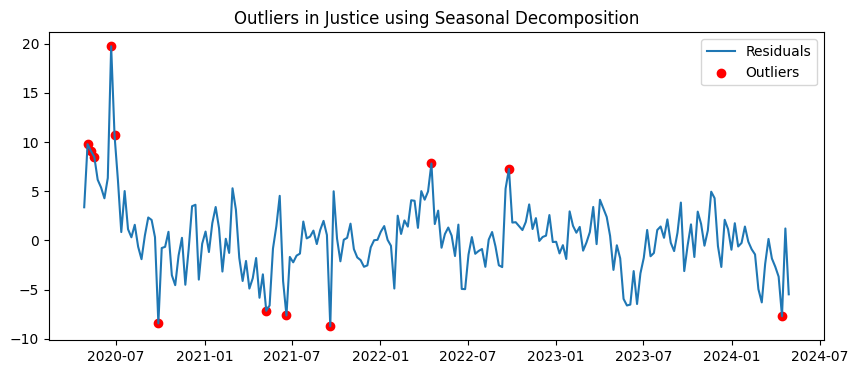

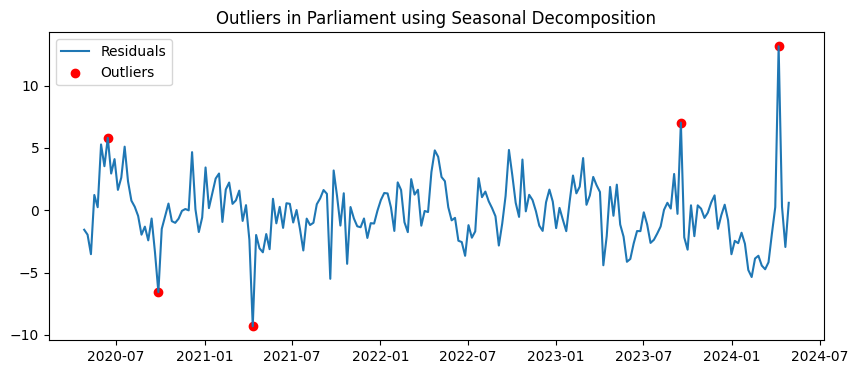

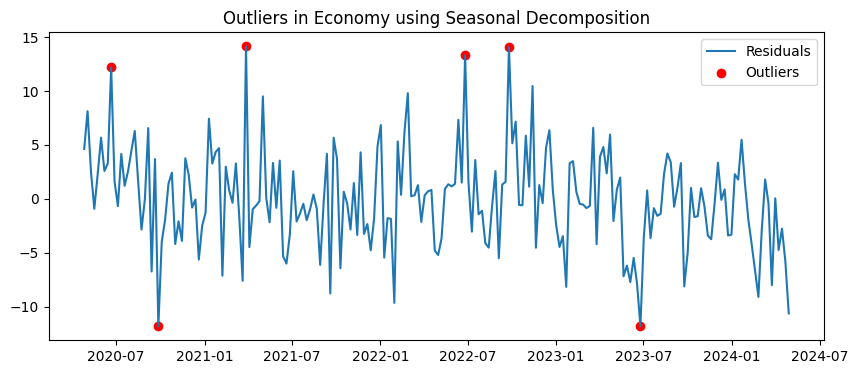

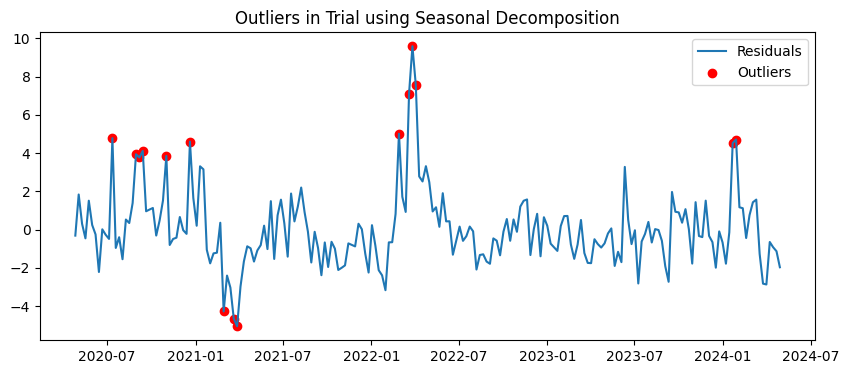

In [ ]:
# Seasonal Decomposition Outlier Detection
for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='additive', period=52)  # Adjust period if needed
    residual = decomposition.resid.dropna()  # Residuals from the decomposition

    # IQR method on residuals
    Q1 = residual.quantile(0.25)
    Q3 = residual.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (residual < lower_bound) | (residual > upper_bound)
    outlier_points = residual[outliers]

    # Plotting
    plt.figure(figsize=(10, 4))
    plt.plot(residual, label="Residuals")
    plt.scatter(outlier_points.index, outlier_points, color='red', label="Outliers")
    plt.title(f"Outliers in {column} using Seasonal Decomposition")
    plt.legend()
    plt.show()


# Short Term Deep Learning Modeling